# Cleaning Data

In [425]:
# Import libraries + csv file with appartments' data

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
df = pd.read_csv('apartments_csv_2.csv')

In [274]:
df

,Unnamed: 0,price_€,building_fees_month,n_rooms,surface_sqm,n_bathrooms,floor,floor_2,tot_floors,parking,year_construction,status,heating,energy_efficiency,city,neighborhood,adress,latitude,longitude
0,0,630.000,67.0,3.0,105,2,2,2.0,3.0,0,1950.0,Buono,Autonomo,G,Milano,Isola,"Via Carmagnola, 3",45.4863,9.1866000000000003
1,1,320.000,133.0,2.0,57,1,1,1.0,7.0,0,1950.0,Ottimo,Centralizzato,G,Milano,Città Studi,"Via Giovanni Pacini, 67",45.484299999999998,9.2347000000000001
2,2,330.000,150.0,3.0,60,1,2,2.0,3.0,0,1970.0,Nuovo,Centralizzato,D,Milano,San Siro,Via Federico Tesio,45.479599999999998,9.1173999999999999
3,3,840.000,285.0,4.0,135,2,2,2.0,8.0,1,1970.0,Ristrutturare,Centralizzato,G,Milano,De Angeli,Piazza Ernesto De Angeli,45.4666,9.1494999999999997
4,4,370.000,200.0,4.0,95,1,2,2.0,7.0,0,1965.0,Buono,Centralizzato,G,Milano,Primaticcio,"Via delle Genziane, 7",45.452800000000003,9.1259800000000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14675,14675,310.000,2.0,4.0,105,1,NaN,NaN,NaN,0,NaN,Ottimo,Centralizzato,F,San Siro,NaN,NaN,45.473100000000002,9.1189699999999991
14676,14676,1.850.000,900.0,4.0,404,3+,A,NaN,7.0,2,1990.0,Ottimo,Centralizzato,G,San Siro,NaN,NaN,45.480800000000002,9.1242000000000001
14677,14677,295.000,150.0,2.0,40,1,5,5.0,5.0,0,2005.0,Ottimo,Centralizzato,F,Milano,Piave - Tricolore,"Via Nino Bixio, 15",45.472200000000001,9.2089999999999996
14678,14678,510.000,NaN,2.0,80,1,3,3.0,5.0,0,1960.0,Buono,Centralizzato,F,Milano,Pagano,"via Grancini, 6",45.471200000000003,9.1608000000000001


## Explore and clean data

We are going to explore the data, searching for type errors into the columns and correct it, to have a dataframe ready to be worked.

In [275]:
df.shape

(14680, 19)

We have 14680 apartament data entries and 19 columns, each corresponding to the appartments' characteristics

First of all we are going to get the number of missing values per column

In [276]:
missing_values_count = df.isnull().sum()

In [277]:
missing_values_count

Unnamed: 0                0
price_€                  31
building_fees_month    4312
n_rooms                 997
surface_sqm             163
n_bathrooms             647
floor                  1016
floor_2                4909
tot_floors             1320
parking                   0
year_construction      2761
status                    0
heating                1272
energy_efficiency      2308
city                    245
neighborhood           1159
adress                 1159
latitude                 24
longitude                24
dtype: int64

It might be helpful to see what percentage of the values in the dataset were missing to give us a better sense of the scale of this problem:

In [278]:
total_cells = np.product(df.shape)
total_missing_values = missing_values_count.sum()

percent_missing = (total_missing_values/total_cells)*100

print(f'We have {round(percent_missing,2)}% of missing values')

We have 8.01% of missing values


Less than 10% of data is missing, not bad!

Now we are going to investigate each column and decide the procedure to follow to manage the missing data

### I) Unamed: 0 Column

We drop the 'Unnamed: 0'column that doesn't contain any relevant information

In [279]:
df_clean = df.drop('Unnamed: 0',axis=1)

In [280]:
df_clean.shape

(14680, 18)

### II) Price € Column

Next, we explore the price column: as we can see, only 74 appartments doesn't have price. Because this correspond to the 0,5% of all appartments and the price prepresent a core feature for our model, we proced to drop these rows.

In [281]:
df_clean = df_clean[df_clean['price_€'].notna()]

In [282]:
df_clean.shape

(14649, 18)

In [283]:
df_clean.isnull().sum()

price_€                   0
building_fees_month    4281
n_rooms                 994
surface_sqm             160
n_bathrooms             644
floor                  1013
floor_2                4892
tot_floors             1317
parking                   0
year_construction      2754
status                    0
heating                1269
energy_efficiency      2305
city                    242
neighborhood           1156
adress                 1156
latitude                 21
longitude                21
dtype: int64

Now we have to check if all the price entries have the correct format and also we have to drop the rows where there is a range of price instead of a single entry, because in this case the real estate agency have create in the same page an advertasing for various appartments to sell, so the informaton doesn't refer to an unique appartment.

We start searching and dropping rows that contain the word 'da' (meaning 'from') mening that the real estate advertising refer to more than one apartment 

In [284]:
df_clean['price_€'][df_clean['price_€'].str.contains('da')].count()

1492

We proceed to drop these 1492 rows

In [285]:
# first we obtain the index of the rows that contain the word 'da' and then drop the row with that index
df_clean.drop(df_clean['price_€'][df_clean['price_€'].str.contains('da')].index,inplace=True)

In [286]:
df_clean.shape

(13157, 18)

Now another format' problem in the dataframe is that there are rows that correctly indicate the price but in the same cell are followed by a string indicating that the price was discouted. an example of this is:

'220.000

235.000(-6.4%)

Prezzo diminuito di  15.000(-6.4%)il 29/01/2021 (18 giorni fa)'

so in this case we want to keep only the actual price indicating at the beginning of the row (in our example 235.000)
To do that we can use Regex language.

In [287]:
df_clean['price_€'][df_clean['price_€'].str.contains('diminuito')]

4806      175.000\n                                    ...
4913      139.000\n                                    ...
5008      189.000\n                                    ...
5119      430.000\n                                    ...
5125      198.000\n                                    ...
                               ...                        
14335     750.000\n                                    ...
14343     2.158.000\n                                  ...
14428     561.159\n                                    ...
14600     490.000\n                                    ...
14657     520.000\n                                    ...
Name: price_€, Length: 259, dtype: object

In [288]:
#we extract all the characters till to \n caracter
regex = r'^(.*)\n'

In [289]:
regex_df=pd.DataFrame(df_clean['price_€'][df_clean['price_€'].str.contains('diminuito')].str.extract(regex,expand=False))

In [290]:
#replace the original value with the new extracted
df_clean.update(regex_df)

In [291]:
df_clean.shape

(13157, 18)

Now we drop rows that contain the symbol '-' because refer to a range of prices

In [292]:
df_clean.drop(df_clean['price_€'][df_clean['price_€'].str.contains('-')].index,inplace=True)

In [293]:
df_clean.shape

(13102, 18)

Lastly, we drop rows that contain 'Prezzo su richiesta' ('price on request')

In [294]:
df_clean.drop(df_clean['price_€'][df_clean['price_€'].str.contains('Prezzo')].index,inplace=True)

In [295]:
df_clean.shape

(12562, 18)

Now we want to convert the column price in integer data type

In [296]:
#we eliminate the thousands point separator
df_clean['price_€']=df_clean['price_€'].str.replace('.','')

In [297]:
df_clean.head()

,price_€,building_fees_month,n_rooms,surface_sqm,n_bathrooms,floor,floor_2,tot_floors,parking,year_construction,status,heating,energy_efficiency,city,neighborhood,adress,latitude,longitude
0,630000,67.0,3.0,105,2,2,2.0,3.0,0,1950.0,Buono,Autonomo,G,Milano,Isola,"Via Carmagnola, 3",45.4863,9.1866000000000003
1,320000,133.0,2.0,57,1,1,1.0,7.0,0,1950.0,Ottimo,Centralizzato,G,Milano,Città Studi,"Via Giovanni Pacini, 67",45.484299999999998,9.2347000000000001
2,330000,150.0,3.0,60,1,2,2.0,3.0,0,1970.0,Nuovo,Centralizzato,D,Milano,San Siro,Via Federico Tesio,45.479599999999998,9.1173999999999999
3,840000,285.0,4.0,135,2,2,2.0,8.0,1,1970.0,Ristrutturare,Centralizzato,G,Milano,De Angeli,Piazza Ernesto De Angeli,45.4666,9.1494999999999997
4,370000,200.0,4.0,95,1,2,2.0,7.0,0,1965.0,Buono,Centralizzato,G,Milano,Primaticcio,"Via delle Genziane, 7",45.452800000000003,9.1259800000000002


In [298]:
df_clean['price_€'] = pd.to_numeric(df_clean['price_€'])

Now that we have numeric values we can investigate about the distribution of the price values

In [299]:
df_clean['price_€'].describe(percentiles =[.25,.5,.75,.9,.95,.99])

count    1.256200e+04
mean     5.756830e+05
std      6.717557e+06
min      8.700000e+02
25%      2.250000e+05
50%      3.400000e+05
75%      5.800000e+05
90%      9.900000e+05
95%      1.480000e+06
99%      2.950000e+06
max      7.500001e+08
Name: price_€, dtype: float64

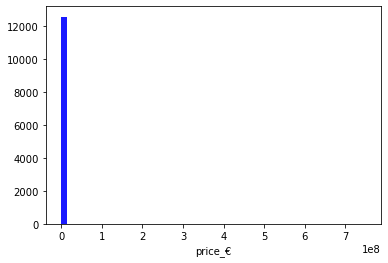

In [300]:
sns.distplot(df_clean['price_€'], kde = False, color = 'b', hist_kws={'alpha': 0.9})

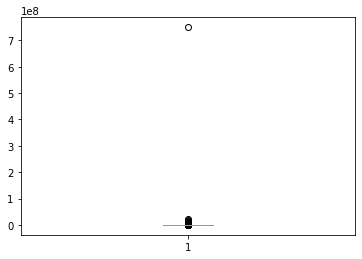

In [301]:
plt.boxplot(df_clean['price_€']);

As you can see there have to be a outlier value because the distribution is highly skewed to the right. we can see that also through the boxplot

In [302]:
df_clean[df_clean['price_€']>30000000]

,price_€,building_fees_month,n_rooms,surface_sqm,n_bathrooms,floor,floor_2,tot_floors,parking,year_construction,status,heating,energy_efficiency,city,neighborhood,adress,latitude,longitude
12906,750000120,100.0,2.0,105,1,R,NaN,5.0,0,1900.0,Ottimo,Autonomo,B,Milano,Sempione,Corso Sempione,45.4818,9.1645000000000003


We proceed to drop the row that contain that erroneous value

In [303]:
df_clean.drop(df_clean[df_clean['price_€']>30000000].index,inplace=True)

In [304]:
df_clean.shape

(12561, 18)

We are going to delete also the apartaments with a price < of 10.000 €

In [305]:
df_clean.drop(df_clean[df_clean['price_€']<10000].index,inplace=True)

In [306]:
df_clean.isnull().sum()

price_€                   0
building_fees_month    2503
n_rooms                 610
surface_sqm              30
n_bathrooms             234
floor                   587
floor_2                3946
tot_floors              609
parking                   0
year_construction      1745
status                    0
heating                 435
energy_efficiency      1539
city                    222
neighborhood           1024
adress                 1024
latitude                 16
longitude                16
dtype: int64

### III) building_fees_month Column

In [307]:
df_clean['building_fees_month']

0         67.0
1        133.0
2        150.0
3        285.0
4        200.0
         ...  
14675      2.0
14676    900.0
14677    150.0
14678      NaN
14679    280.0
Name: building_fees_month, Length: 12558, dtype: float64

The type of the values is float64 so we can investigate the distribution

In [308]:
df_clean.building_fees_month.describe(percentiles =[.25,.5,.75,.9,.95,.99])

count    10055.000000
mean       179.174540
std        136.035877
min          0.000000
25%        100.000000
50%        150.000000
75%        213.000000
90%        341.000000
95%        450.000000
99%        722.300000
max        980.000000
Name: building_fees_month, dtype: float64

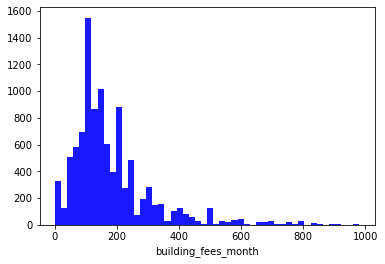

In [309]:
sns.distplot(df_clean['building_fees_month'], kde = False, color = 'b', hist_kws={'alpha': 0.9})

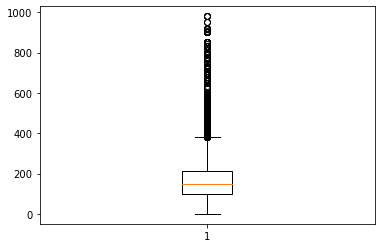

In [310]:
plt.boxplot(df_clean['building_fees_month'][df_clean['building_fees_month'].notna()]);

### IV) n_rooms Column

We start analyzing the feature distribution

In [313]:
df_clean.n_rooms.describe(percentiles =[.25,.5,.75,.9,.95,.99])

count    11948.000000
mean         2.641028
std          0.989582
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
90%          4.000000
95%          4.000000
99%          5.000000
max         20.000000
Name: n_rooms, dtype: float64

As you can see, the 99% of the apartments have a maximum of 5 rooms. We are going to investigate if the apartments with more of 5 represents a typing error

In [314]:
df_clean[df_clean['n_rooms']>5]

,price_€,building_fees_month,n_rooms,surface_sqm,n_bathrooms,floor,floor_2,tot_floors,parking,year_construction,status,heating,energy_efficiency,city,neighborhood,adress,latitude,longitude
4242,1350000,NaN,6.0,210,3+,5,5.0,5.0,0,1800.0,Buono,Centralizzato,G,Milano,Montenero,"Via Amatore Antonio Sciesa, 1",45.461799999999997,9.2096
7132,1150000,NaN,7.0,500,3+,NaN,NaN,1.0,2,1950.0,Buono,Autonomo,G,Milano,Porta Venezia,via vittorio veneto,45.476599999999998,9.2012900000000002
8550,360000,200.0,6.0,230,1,S - T,NaN,3.0,1,1920.0,Ristrutturare,NaN,G,Milano,Greco - Segnano,"Via Comune Antico, 11",45.503,9.2094000000000005
8555,1800000,NaN,20.0,648,3+,8 - 9,NaN,9.0,2,2020.0,Nuovo,Autonomo,A+,Milano,Gallaratese,Via Cefalù,45.502000000000002,9.1153999999999993
13050,1900000,NaN,10.0,1.575,NaN,NaN,NaN,1.0,1,NaN,Buono,Autonomo,NaN,Milano,Gallaratese,Via Gallarate,45.500999999999998,9.1212
13567,4300000,NaN,15.0,752,3+,S - 4,NaN,4.0,2,2008.0,Ottimo,Autonomo,C,Milano,San Siro,Via dei Sagredo,45.476500000000001,9.1303000000000001


We can suppose that the entries are correct because the apartments with more than 5 rooms have also a wide surface and high price

Now we investigate if there is some erroneous values. If all is correct, we will have integer values between 1 and 20

In [315]:
df_clean['n_rooms'].unique()

array([ 3.,  2.,  4., nan,  1.,  5.,  6.,  7., 20., 10., 15.])

As you can see everething is correct

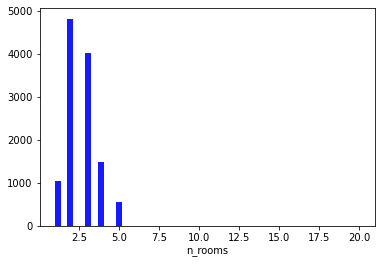

In [316]:
sns.distplot(df_clean['n_rooms'], kde = False, color = 'b', hist_kws={'alpha': 0.9})

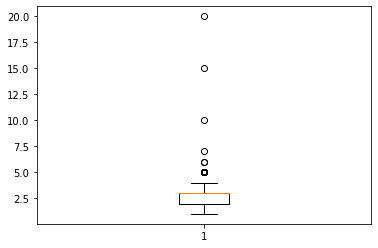

In [317]:
plt.boxplot(df_clean['n_rooms'][df_clean['n_rooms'].notna()]);

# V) surface_sqm Column

In [318]:
df_clean['surface_sqm']

0        105
1         57
2         60
3        135
4         95
        ... 
14675    105
14676    404
14677     40
14678     80
14679    120
Name: surface_sqm, Length: 12558, dtype: object

Because the dtype is object there have to be some non numeric values. we can start investigating if there is the m^2 string next to some numeric values

In [319]:
df_clean['surface_sqm'][df_clean['surface_sqm'].str.contains('m',na=False)] #na=False because there are some nan values

169               88 m² | commerciale 90
552             170 m² | commerciale 179
973               57 m² | commerciale 60
996               73 m² | commerciale 80
1120            140 m² | commerciale 147
                      ...               
14485           330 m² | commerciale 348
14550             46 m² | commerciale 62
14560             48 m² | commerciale 55
14571           300 m² | commerciale 324
14637    122 m², terreno di proprietà 22
Name: surface_sqm, Length: 266, dtype: object

In [320]:
regex = r'^(.*)\sm'

In [321]:
regex_df=pd.DataFrame(df_clean['surface_sqm'][df_clean['surface_sqm'].str.contains('m',na=False)].str.extract(regex,expand=False))

In [322]:
regex_df.head()

,surface_sqm
169,88
552,170
973,57
996,73
1120,140


In [323]:
#replace the original value with the new extracted
df_clean.update(regex_df)

Now we convert it into numerical values

In [324]:
df_clean['surface_sqm'] = pd.to_numeric(df_clean['surface_sqm'])

In [325]:
df_clean['surface_sqm']

0        105.0
1         57.0
2         60.0
3        135.0
4         95.0
         ...  
14675    105.0
14676    404.0
14677     40.0
14678     80.0
14679    120.0
Name: surface_sqm, Length: 12558, dtype: float64

In [326]:
df_clean['surface_sqm'].describe(percentiles =[.25,.5,.75,.9,.95,.99])

count    12528.000000
mean        98.601400
std         72.326527
min          1.000000
25%         55.000000
50%         80.000000
75%        116.000000
90%        170.000000
95%        222.650000
99%        379.460000
max        950.000000
Name: surface_sqm, dtype: float64

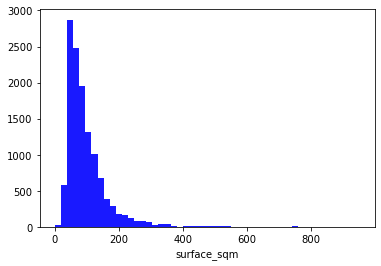

In [327]:
sns.distplot(df_clean['surface_sqm'], kde = False, color = 'b', hist_kws={'alpha': 0.9})

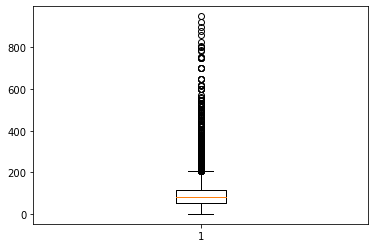

In [328]:
plt.boxplot(df_clean['surface_sqm'][df_clean['surface_sqm'].notna()]);

# 6) n_bathrooms Column

In [329]:
df_clean.shape

(12558, 18)

First we investigate the dtype of the column

In [331]:
df_clean['n_bathrooms']

0         2
1         1
2         1
3         2
4         1
         ..
14675     1
14676    3+
14677     1
14678     1
14679     2
Name: n_bathrooms, Length: 12558, dtype: object

As you can see, the dtype is an object so we have to check what kind of characters are present into each value entry.

In [333]:
# First we investigate about alpha characters
df_clean['n_bathrooms'][df_clean['n_bathrooms'].str.contains('[a-z]',na=False)] 

Series([], Name: n_bathrooms, dtype: object)

There aren't alpha characters into the column

In [334]:
# now searching for the presence of symbols (no alphanumeric characters \W)
df_clean['n_bathrooms'][df_clean['n_bathrooms'].str.contains('\W',na=False)] 

69       3+
70       3+
92       3+
102      3+
195      3+
         ..
14599    3+
14622    3+
14655    3+
14660    3+
14676    3+
Name: n_bathrooms, Length: 303, dtype: object

In [335]:
df_clean['n_bathrooms'][df_clean['n_bathrooms'].str.contains('3\+',na=False)]

69       3+
70       3+
92       3+
102      3+
195      3+
         ..
14599    3+
14622    3+
14655    3+
14660    3+
14676    3+
Name: n_bathrooms, Length: 303, dtype: object

There are 303 values with symbols and all corresponds to '3+' indicating the presence of more of 3 bathrooms into the apartament. because we can't use symbols in a machine learnig model, we replace this with '4'

In [337]:
df_clean['n_bathrooms'].replace('3+','4',inplace=True)

Now we convert the dtype in numerical values

In [339]:
df_clean['n_bathrooms'] = pd.to_numeric(df_clean['n_bathrooms'])

In [340]:
df_clean['n_bathrooms'].describe(percentiles=[.25,.5,.75,.9,.95,.99])

count    12324.000000
mean         1.452532
std          0.719717
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
90%          2.000000
95%          3.000000
99%          4.000000
max          4.000000
Name: n_bathrooms, dtype: float64

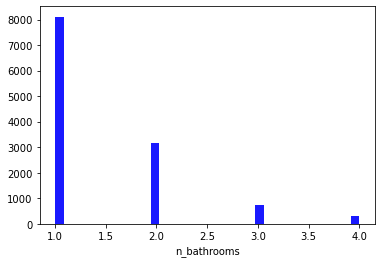

In [341]:
sns.distplot(df_clean['n_bathrooms'], kde = False, color = 'b', hist_kws={'alpha': 0.9})

# 7) floor_2 Column

We have webscraping the floor information with 2 methods but the more correct one is the floor_2 column. The only problem with this code is that it takes only digit values, so we want to retain all the digits of this column and replace nan values with the letters or floor in format of range #-# like (8-9) from the column floor.

In [342]:
df_clean['floor'][df_clean['floor'].str.contains('[A-Z]',na=False)]

6            R
10           T
12           R
17           T
19           R
         ...  
14644        T
14656        R
14662    S - T
14667        T
14676        A
Name: floor, Length: 3444, dtype: object

In [343]:
df_clean['floor_2']=np.where((df_clean['floor_2'].isnull()) & (df_clean['floor'].str.contains('[A-Z]',na=False)),
                                          df_clean['floor'],df_clean['floor_2'])

Now we are going to include the range of numbers where the floor_2 column have 'nan' values

In [349]:
df_clean['floor_2']=np.where((df_clean['floor_2'].isnull()) & (df_clean['floor'].str.contains(r'\d\s\-\s\d',na=False)),
                                          df_clean['floor'],df_clean['floor_2'])

In [351]:
df_clean['floor_2'].unique()

array([2.0, 1.0, 'R', 5.0, 4.0, 'T', 6.0, 'S', 3.0, 7.0, 'T - 9', nan,
       8.0, 9.0, 'S - 1', 'S - 5', 'S - T', 'S - R', 'T - 4', 'T - 3',
       '1 - 2', '2 - 3', 'T - R', 'S - 2', 16.0, '8 - 9', '5 - 6',
       'T - 1', '4 - 5', 'S - 4', '3 - 4', '6 - 7', 10.0, 'S - 3',
       'T - 2', 11.0, 'R - 2', '7 - 8', 'S - 7', '9 - 10', 14.0, 'S - 8',
       'T - 5', 25.0, 12.0, 13.0, '1 - 4', 'S - 6', 'R - 7', '2 - 4',
       19.0, 'S - 9', '1 - 3', 'R - 9', 'R - 1', 'R - 3', 'S - 10', 15.0,
       '4 - 6', 18.0, 'T - 8', 'T - 7', 'A', 'M', 17.0, 22.0, '6 - 8',
       'T - A'], dtype=object)

Now, in all range values we retain only the last value

In [354]:
regex_df=pd.DataFrame(df_clean['floor_2'][df_clean['floor_2'].str.contains('-',na=False)].str.extract(r'^\w\s\-\s(\w)',expand=False))
df_clean.update(regex_df)

In [355]:
df_clean['floor_2'].unique()

array([2.0, 1.0, 'R', 5.0, 4.0, 'T', 6.0, 'S', 3.0, 7.0, '9', nan, 8.0,
       9.0, '1', '5', '4', '3', '2', 16.0, '6', '7', 10.0, 11.0, '8',
       14.0, 25.0, 12.0, 13.0, 19.0, 15.0, 18.0, 'A', 'M', 17.0, 22.0],
      dtype=object)

Now we don't need more the floor column so we can drop it.

In [356]:
df_clean.drop('floor',axis=1,inplace=True)

In [357]:
df_clean.shape

(12558, 17)

Now we investigate about the floor letters character and replace with a digit

In [358]:
df_clean['floor_2'].unique()

array([2.0, 1.0, 'R', 5.0, 4.0, 'T', 6.0, 'S', 3.0, 7.0, '9', nan, 8.0,
       9.0, '1', '5', '4', '3', '2', 16.0, '6', '7', 10.0, 11.0, '8',
       14.0, 25.0, 12.0, 13.0, 19.0, 15.0, 18.0, 'A', 'M', 17.0, 22.0],
      dtype=object)

- T = Ground floor: we replace it with 0
- R = Mezzanine floor: we replace it with 0
- S = Basement Floor: we replace it with 0
- A = Attic: we replace it with the value of tot_floor column
- M: we replace it with 0

In [363]:
df_clean['floor_2'].replace({'T':'0','R':'0','S':'0','M':'0'},inplace=True)

Regarding the 'A' convertion, we are going to replace it with the number indicated in the total floor of the building if the value is not na

In [364]:
df_clean['floor_2']=np.where((df_clean['tot_floors'].notna()) & (df_clean['floor_2'].str.contains('A',na=False)),
                                          df_clean['tot_floors'],df_clean['floor_2'])

In [366]:
df_clean[df_clean['floor_2'].str.contains('A',na=False)]

,price_€,building_fees_month,n_rooms,surface_sqm,n_bathrooms,floor_2,tot_floors,parking,year_construction,status,heating,energy_efficiency,city,neighborhood,adress,latitude,longitude


In [367]:
df_clean['floor_2'].unique()

array([2.0, 1.0, '0', 5.0, 4.0, 6.0, 3.0, 7.0, '9', nan, 8.0, 9.0, '1',
       '5', '4', '3', '2', 16.0, '6', '7', 10.0, 11.0, '8', 14.0, 25.0,
       12.0, 13.0, 19.0, 15.0, 18.0, 17.0, 22.0], dtype=object)

We convert the column into numerical characters

In [368]:
df_clean['floor_2'] = pd.to_numeric(df_clean['floor_2'])

In [369]:
df_clean.isnull().sum()

price_€                   0
building_fees_month    2503
n_rooms                 610
surface_sqm              30
n_bathrooms             234
floor_2                 411
tot_floors              609
parking                   0
year_construction      1745
status                    0
heating                 435
energy_efficiency      1539
city                    222
neighborhood           1024
adress                 1024
latitude                 16
longitude                16
dtype: int64

# 8) tot_floors Column

First we are going to examine the dtype

In [370]:
df_clean['tot_floors']

0        3.0
1        7.0
2        3.0
3        8.0
4        7.0
        ... 
14675    NaN
14676    7.0
14677    5.0
14678    5.0
14679    8.0
Name: tot_floors, Length: 12558, dtype: float64

As you can see, the dtype is float so the correct format. Now we need to explore the distribution of the values to check if there are some outliers.

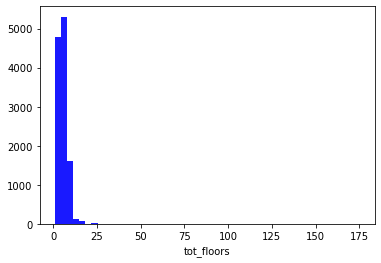

In [371]:
sns.distplot(df_clean['tot_floors'], kde = False, color = 'b', hist_kws={'alpha': 0.9})

In [372]:
df_clean['tot_floors'].describe(percentiles=[.25,.50,.75,.90,.95,.999])

count    11949.000000
mean         5.295757
std          3.082028
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
90%          8.000000
95%          9.000000
99.9%       25.052000
max        175.000000
Name: tot_floors, dtype: float64

Because the 99.9% of the apartments have less than 26 floor we want manually investigate apartments > 26

In [374]:
df_clean[df_clean['tot_floors']>26]

,price_€,building_fees_month,n_rooms,surface_sqm,n_bathrooms,floor_2,tot_floors,parking,year_construction,status,heating,energy_efficiency,city,neighborhood,adress,latitude,longitude
7861,4100000,1.0,NaN,410.0,4.0,10.0,29.0,1,1950.0,Ottimo,Centralizzato,E,Milano,Repubblica,Piazza della Repubblica,45.479900000000001,9.1990999999999996
9929,1650000,NaN,4.0,150.0,2.0,2.0,34.0,1,2000.0,Ottimo,Autonomo,A+,Milano,Melchiorre Gioia,Viale della Liberazione,45.482599999999998,9.1940000000000008
10239,1650000,NaN,4.0,150.0,2.0,2.0,34.0,1,2000.0,Ottimo,Autonomo,A+,Milano,Melchiorre Gioia,Viale della Liberazione,45.482599999999998,9.1940000000000008
13464,820000,NaN,5.0,308.0,3.0,0.0,175.0,5,1950.0,Ottimo,Autonomo,C,Milano,Argonne - Corsica,"Via Umberto Masotto, 21",45.467100000000002,9.2331000000000003
13540,4000000,NaN,NaN,435.0,4.0,14.0,31.0,1,1950.0,Buono,Centralizzato,NaN,Milano,Repubblica,"Via Vittor Pisani, 2",45.480400000000003,9.1994000000000007
13614,3550000,1.0,4.0,315.0,3.0,8.0,56.0,1,2019.0,Nuovo,Centralizzato,A,Palestro,NaN,NaN,45.465800000000002,9.2028999999999996


First of all we can see that there is a value of 175 that is without doubts wrong because in Milan there aren't so high building.so we change the value in NaN.

In [375]:
df_clean['tot_floors'].replace(175,np.nan,inplace=True)

Next we have examined the remaining one apartments': The apartments with 31 and 29 total floors are correct while we have to remove the apartments with 34 and 56 total floors because are a fake advertisement

In [376]:
df_clean.drop(df_clean[df_clean['tot_floors'].isin([34,56])].index,inplace=True)

In [377]:
df_clean[df_clean['tot_floors']>26]

,price_€,building_fees_month,n_rooms,surface_sqm,n_bathrooms,floor_2,tot_floors,parking,year_construction,status,heating,energy_efficiency,city,neighborhood,adress,latitude,longitude
7861,4100000,1.0,NaN,410.0,4.0,10.0,29.0,1,1950.0,Ottimo,Centralizzato,E,Milano,Repubblica,Piazza della Repubblica,45.479900000000001,9.1990999999999996
13540,4000000,NaN,NaN,435.0,4.0,14.0,31.0,1,1950.0,Buono,Centralizzato,NaN,Milano,Repubblica,"Via Vittor Pisani, 2",45.480400000000003,9.1994000000000007


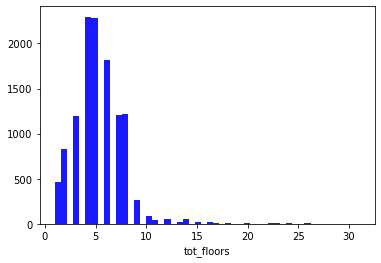

In [378]:
sns.distplot(df_clean['tot_floors'], kde = False, color = 'b', hist_kws={'alpha': 0.9})

# 9) parking Column

In [379]:
df_clean['parking']

0        0
1        0
2        0
3        1
4        0
        ..
14675    0
14676    2
14677    0
14678    0
14679    0
Name: parking, Length: 12555, dtype: int64

data type is integer

In [380]:
df_clean['parking'].value_counts()

0    9602
1    2469
2     465
3      11
5       3
4       3
7       1
6       1
Name: parking, dtype: int64

Because we want to know only if the apartment has a parking slot or not we have to replace all the values > 1 as 1.

In [381]:
df_clean['parking'] = np.where(df_clean['parking']>1, 
                              1,df_clean['parking'])

In [382]:
df_clean['parking'].value_counts()

0    9602
1    2953
Name: parking, dtype: int64

# 10) year_construction Column

In [383]:
df_clean['year_construction']

0        1950.0
1        1950.0
2        1970.0
3        1970.0
4        1965.0
          ...  
14675       NaN
14676    1990.0
14677    2005.0
14678    1960.0
14679    1960.0
Name: year_construction, Length: 12555, dtype: float64

data type is float

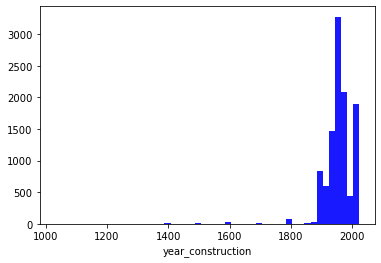

In [384]:
sns.distplot(df_clean['year_construction'], kde = False, color = 'b', hist_kws={'alpha': 0.9})

In [389]:
df_clean[df_clean['year_construction']<1300]

,price_€,building_fees_month,n_rooms,surface_sqm,n_bathrooms,floor_2,tot_floors,parking,year_construction,status,heating,energy_efficiency,city,neighborhood,adress,latitude,longitude
997,199000,200.0,3.0,85.0,1.0,6.0,8.0,0,1067.0,Ristrutturare,Centralizzato,G,Milano,Gallaratese,"Via Ugo Betti, 163",45.496099999999998,9.1083999999999996
1280,370000,105.0,2.0,60.0,1.0,0.0,7.0,0,1030.0,Ottimo,Centralizzato,G,Milano,Melchiorre Gioia,"Via Ettore Bellani, 2",45.485999999999997,9.1950000000000003
10459,135000,100.0,2.0,49.0,1.0,0.0,5.0,0,1197.0,Buono,Centralizzato,F,Milano,Bisceglie,"Via della Martinella, 15",45.459600000000002,9.1120000000000001


In [402]:
df_clean['year_construction']<1300 = np.na

0        False
1        False
2        False
3        False
4        False
         ...  
14675    False
14676    False
14677    False
14678    False
14679    False
Name: year_construction, Length: 12555, dtype: bool

We suppose that a year of construction < 1300 is an error so we are going to replace the year with 'nan'

In [401]:
df_clean[df_clean['year_construction']<1400]

,price_€,building_fees_month,n_rooms,surface_sqm,n_bathrooms,floor_2,tot_floors,parking,year_construction,status,heating,energy_efficiency,city,neighborhood,adress,latitude,longitude
4304,288000,90.0,1.0,30.0,1.0,4.0,4.0,0,1300.0,Ottimo,Autonomo,F,Milano,Carrobbio,Corso di Porta Ticinese,45.457500000000003,9.1807999999999996
7421,590000,50.0,4.0,95.0,2.0,0.0,3.0,0,1300.0,Buono,Autonomo,F,Milano,Carrobbio,Corso di Porta Ticinese,45.457700000000003,9.1809999999999992


# 11) status Column

We have to investigate about the categories into the column about the status of the apartment

In [403]:
df_clean['status'].value_counts()

Ottimo           5712
Buono            3498
Nuovo            1874
Ristrutturare    1471
Name: status, dtype: int64

As you can see there are 4 categories: 

Ottimo: Excellent

Buono: Good

Nuovo: New

Ristrutturare: To be Restored

# 12) Heating Column

In [404]:
df_clean['heating'].value_counts()

Centralizzato    7791
Autonomo         4329
Name: heating, dtype: int64

All is correct

# 12) energy efficiency Column

In [406]:
df_clean['energy_efficiency'].value_counts()

G     5099
F     2007
E     1250
D      774
B      488
A      464
C      407
A+     192
A2     106
A1      85
A4      75
A3      69
Name: energy_efficiency, dtype: int64

Each letter refer to a quality of the apartment' energy system, going from best quality indicating as A4 to the least efficient indicating with G.

To follow the same system we have to replace A+ with A1

In [408]:
df_clean['energy_efficiency'].replace('A+','A1',inplace=True)

# 13) city Column

In [409]:
df_clean['city'].value_counts()

Milano                11532
San Siro                 29
Palestro                 26
Città Studi              26
Navigli - Darsena        25
                      ...  
Villa San Giovanni        1
Molise - Cuoco            1
Quarto Oggiaro            1
Turati                    1
Udine                     1
Name: city, Length: 140, dtype: int64

As you can see, in the city column there are also the neighborhoods, so before we replace them with 'Milan' entry, we want to replace the 'nan' values in the neighborhood column with these values.

# 14) neighborhood Column

We are going to replace nan values with the neighborhood name present into the city column

In [410]:
df_clean['neighborhood'].isnull().sum()

1023

In [411]:
df_clean['neighborhood'] = np.where((df_clean['neighborhood'].isnull()) & (df_clean['city']!='Milano'),
                                   df_clean['city'],df_clean['neighborhood'])

In [412]:
df_clean['neighborhood'].isnull().sum()

222

Perfect now we can replace all the values of the city column with 'Milano'

In [413]:
df_clean['city'] = 'Milano'

In [414]:
df_clean['city'].value_counts()

Milano    12555
Name: city, dtype: int64

# 15) adress Column

Now we have to check

In [415]:
df_clean['adress']

0               Via Carmagnola, 3
1         Via Giovanni Pacini, 67
2              Via Federico Tesio
3        Piazza Ernesto De Angeli
4           Via delle Genziane, 7
                   ...           
14675                         NaN
14676                         NaN
14677          Via Nino Bixio, 15
14678             via Grancini, 6
14679                via boni, 24
Name: adress, Length: 12555, dtype: object

# 16) latitude, longitude Columns

We have now to investigate about nan values of these 2 columns and verify if the correspondent apartment have information about the neighborhood or address because in that case we can obtain the latitute and longitude information throgh an arcgis API.

In [417]:
df_clean[df_clean['latitude'].isnull()]

,price_€,building_fees_month,n_rooms,surface_sqm,n_bathrooms,floor_2,tot_floors,parking,year_construction,status,heating,energy_efficiency,city,neighborhood,adress,latitude,longitude
782,120000,NaN,1.0,24.0,1.0,1.0,NaN,0,NaN,Buono,Centralizzato,NaN,Milano,NaN,NaN,NaN,NaN
9270,177000,NaN,1.0,53.0,1.0,1.0,5.0,0,2020.0,Nuovo,Autonomo,NaN,Milano,NaN,NaN,NaN,NaN
11846,580000,NaN,3.0,403.0,2.0,1.0,1.0,0,2000.0,Ottimo,Autonomo,G,Milano,NaN,NaN,NaN,NaN
12209,1000000,291.0,3.0,100.0,1.0,4.0,4.0,0,1950.0,Ottimo,Autonomo,F,Milano,NaN,NaN,NaN,NaN
12471,170000,90.0,2.0,52.0,1.0,5.0,5.0,0,1930.0,Buono,Autonomo,G,Milano,NaN,NaN,NaN,NaN
12562,2200000,540.0,5.0,200.0,2.0,4.0,6.0,0,1920.0,Ristrutturare,Centralizzato,E,Milano,NaN,NaN,NaN,NaN
12697,980000,600.0,3.0,160.0,2.0,5.0,5.0,1,NaN,Ottimo,Centralizzato,A,Milano,NaN,NaN,NaN,NaN
12910,749000,100.0,5.0,140.0,2.0,4.0,4.0,0,1930.0,Buono,Autonomo,F,Milano,NaN,NaN,NaN,NaN
13336,560000,150.0,5.0,95.0,1.0,4.0,5.0,0,1892.0,Ottimo,Centralizzato,G,Milano,NaN,NaN,NaN,NaN
13675,148000,67.0,1.0,42.0,1.0,5.0,5.0,0,1930.0,Ottimo,Autonomo,G,Milano,NaN,NaN,NaN,NaN


As you can see, where latitude and longitude is missed, adress and neighborhood information is also missed so we can't obtain the latitude and longitude value in any manner so we have to drop this rows

In [418]:
df_clean.shape

(12555, 17)

In [419]:
df_clean.drop(df_clean[df_clean['latitude'].isnull()].index, inplace=True)

In [420]:
df_clean.shape

(12539, 17)

# Drop duplicate rows

In [421]:
df_clean.drop_duplicates(inplace=True)

In [422]:
df_clean.shape

(12210, 17)

In [423]:
df_clean.isnull().sum()

price_€                   0
building_fees_month    2436
n_rooms                 598
surface_sqm              30
n_bathrooms             229
floor_2                 402
tot_floors              590
parking                   0
year_construction      1696
status                    0
heating                 429
energy_efficiency      1494
city                      0
neighborhood            201
adress                  983
latitude                  0
longitude                 0
dtype: int64

We have cleaned the dataframe and is ready to proceed with other analysis. We sve it in a new csv file

In [424]:
df_clean.to_csv('apartments_clean_df.csv')